<a href="https://colab.research.google.com/github/hari-reddy-008/customer-segmentation/blob/main/rv4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [759]:
# Importing Libarirs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [733]:
data = pd.read_csv('/content/drive/MyDrive/rv-1/rv4/segmentation data.csv')

In [734]:
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB
None
                 ID          Sex  Marital status          Age   Education  \
count  2.000000e+03  2000.000000     2000.000000  2000.000000  2000.00000   
mean   1.000010e+08     0.457000        0.496500    35.909000     1.03800   
std    5.774946e+02     0.498272        0.500113    11.719402     0.59978   
min    1.000000e+08     0.000000        0.000000    18.000000     0.00000   
25%    1.000005e+08     

In [735]:
data.isnull().sum()

,0
ID,0
Sex,0
Marital status,0
Age,0
Education,0
Income,0
Occupation,0
Settlement size,0


In [736]:
data.duplicated().sum()

np.int64(0)

**Performing EDA**

In [737]:
data

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


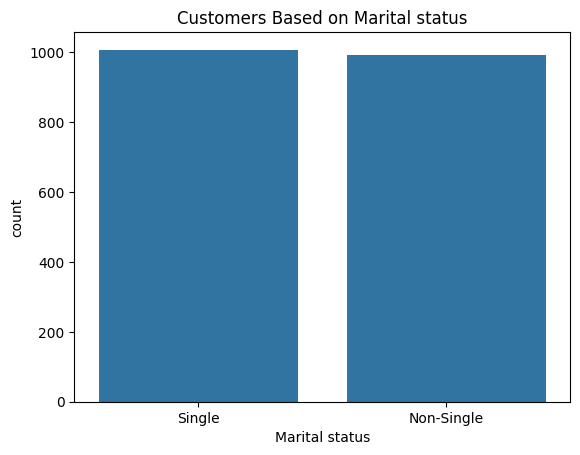

In [738]:
sns.countplot(data = data, x = 'Marital status')
plt.title('Customers Based on Marital status')
plt.xticks([0, 1],['Single', 'Non-Single'])
plt.show()

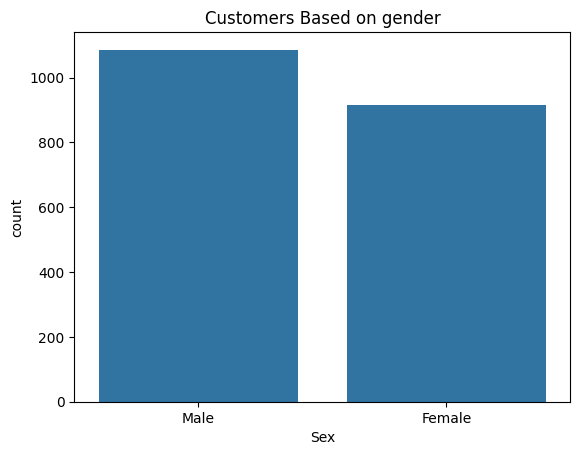

In [739]:
sns.countplot(data = data, x = 'Sex')
plt.title('Customers Based on gender')
plt.xticks([1, 0],['Female', 'Male'])
plt.show()

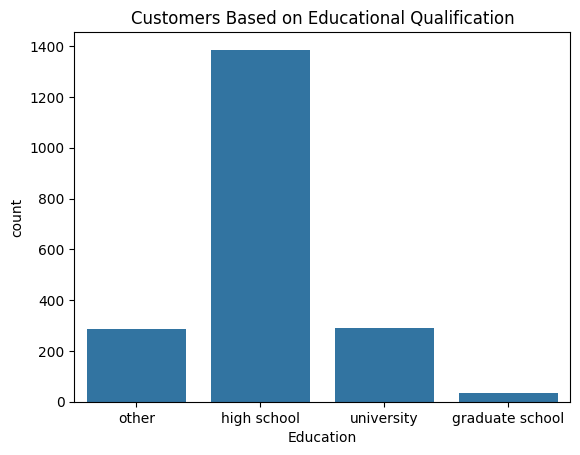

In [740]:
sns.countplot(data = data, x = 'Education')
plt.title('Customers Based on Educational Qualification')
plt.xticks([0,1,2, 3],['other', 'high school', 'university', 'graduate school'])
plt.show()

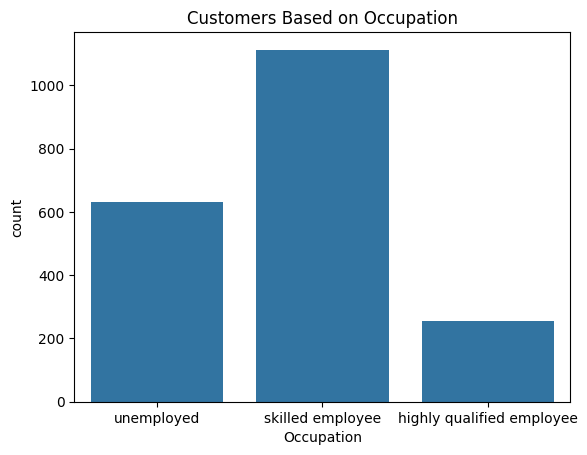

In [741]:
sns.countplot(data = data, x = 'Occupation')
plt.title('Customers Based on Occupation')
plt.xticks([0,1,2],['unemployed', 'skilled employee', 'highly qualified employee'])
plt.show()

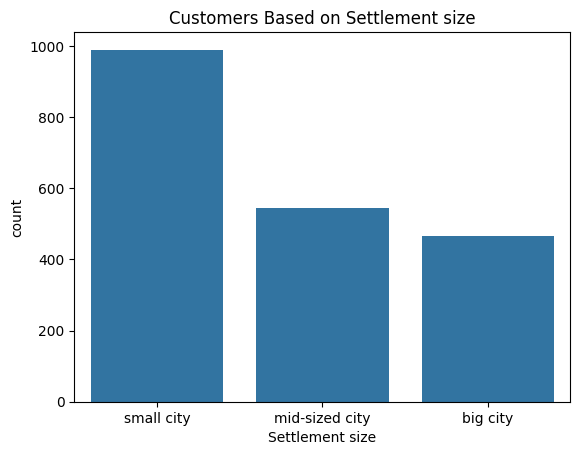

In [742]:
sns.countplot(data = data, x = 'Settlement size')
plt.title('Customers Based on Settlement size')
plt.xticks([0,1,2],['small city', 'mid-sized city', 'big city'])
plt.show()

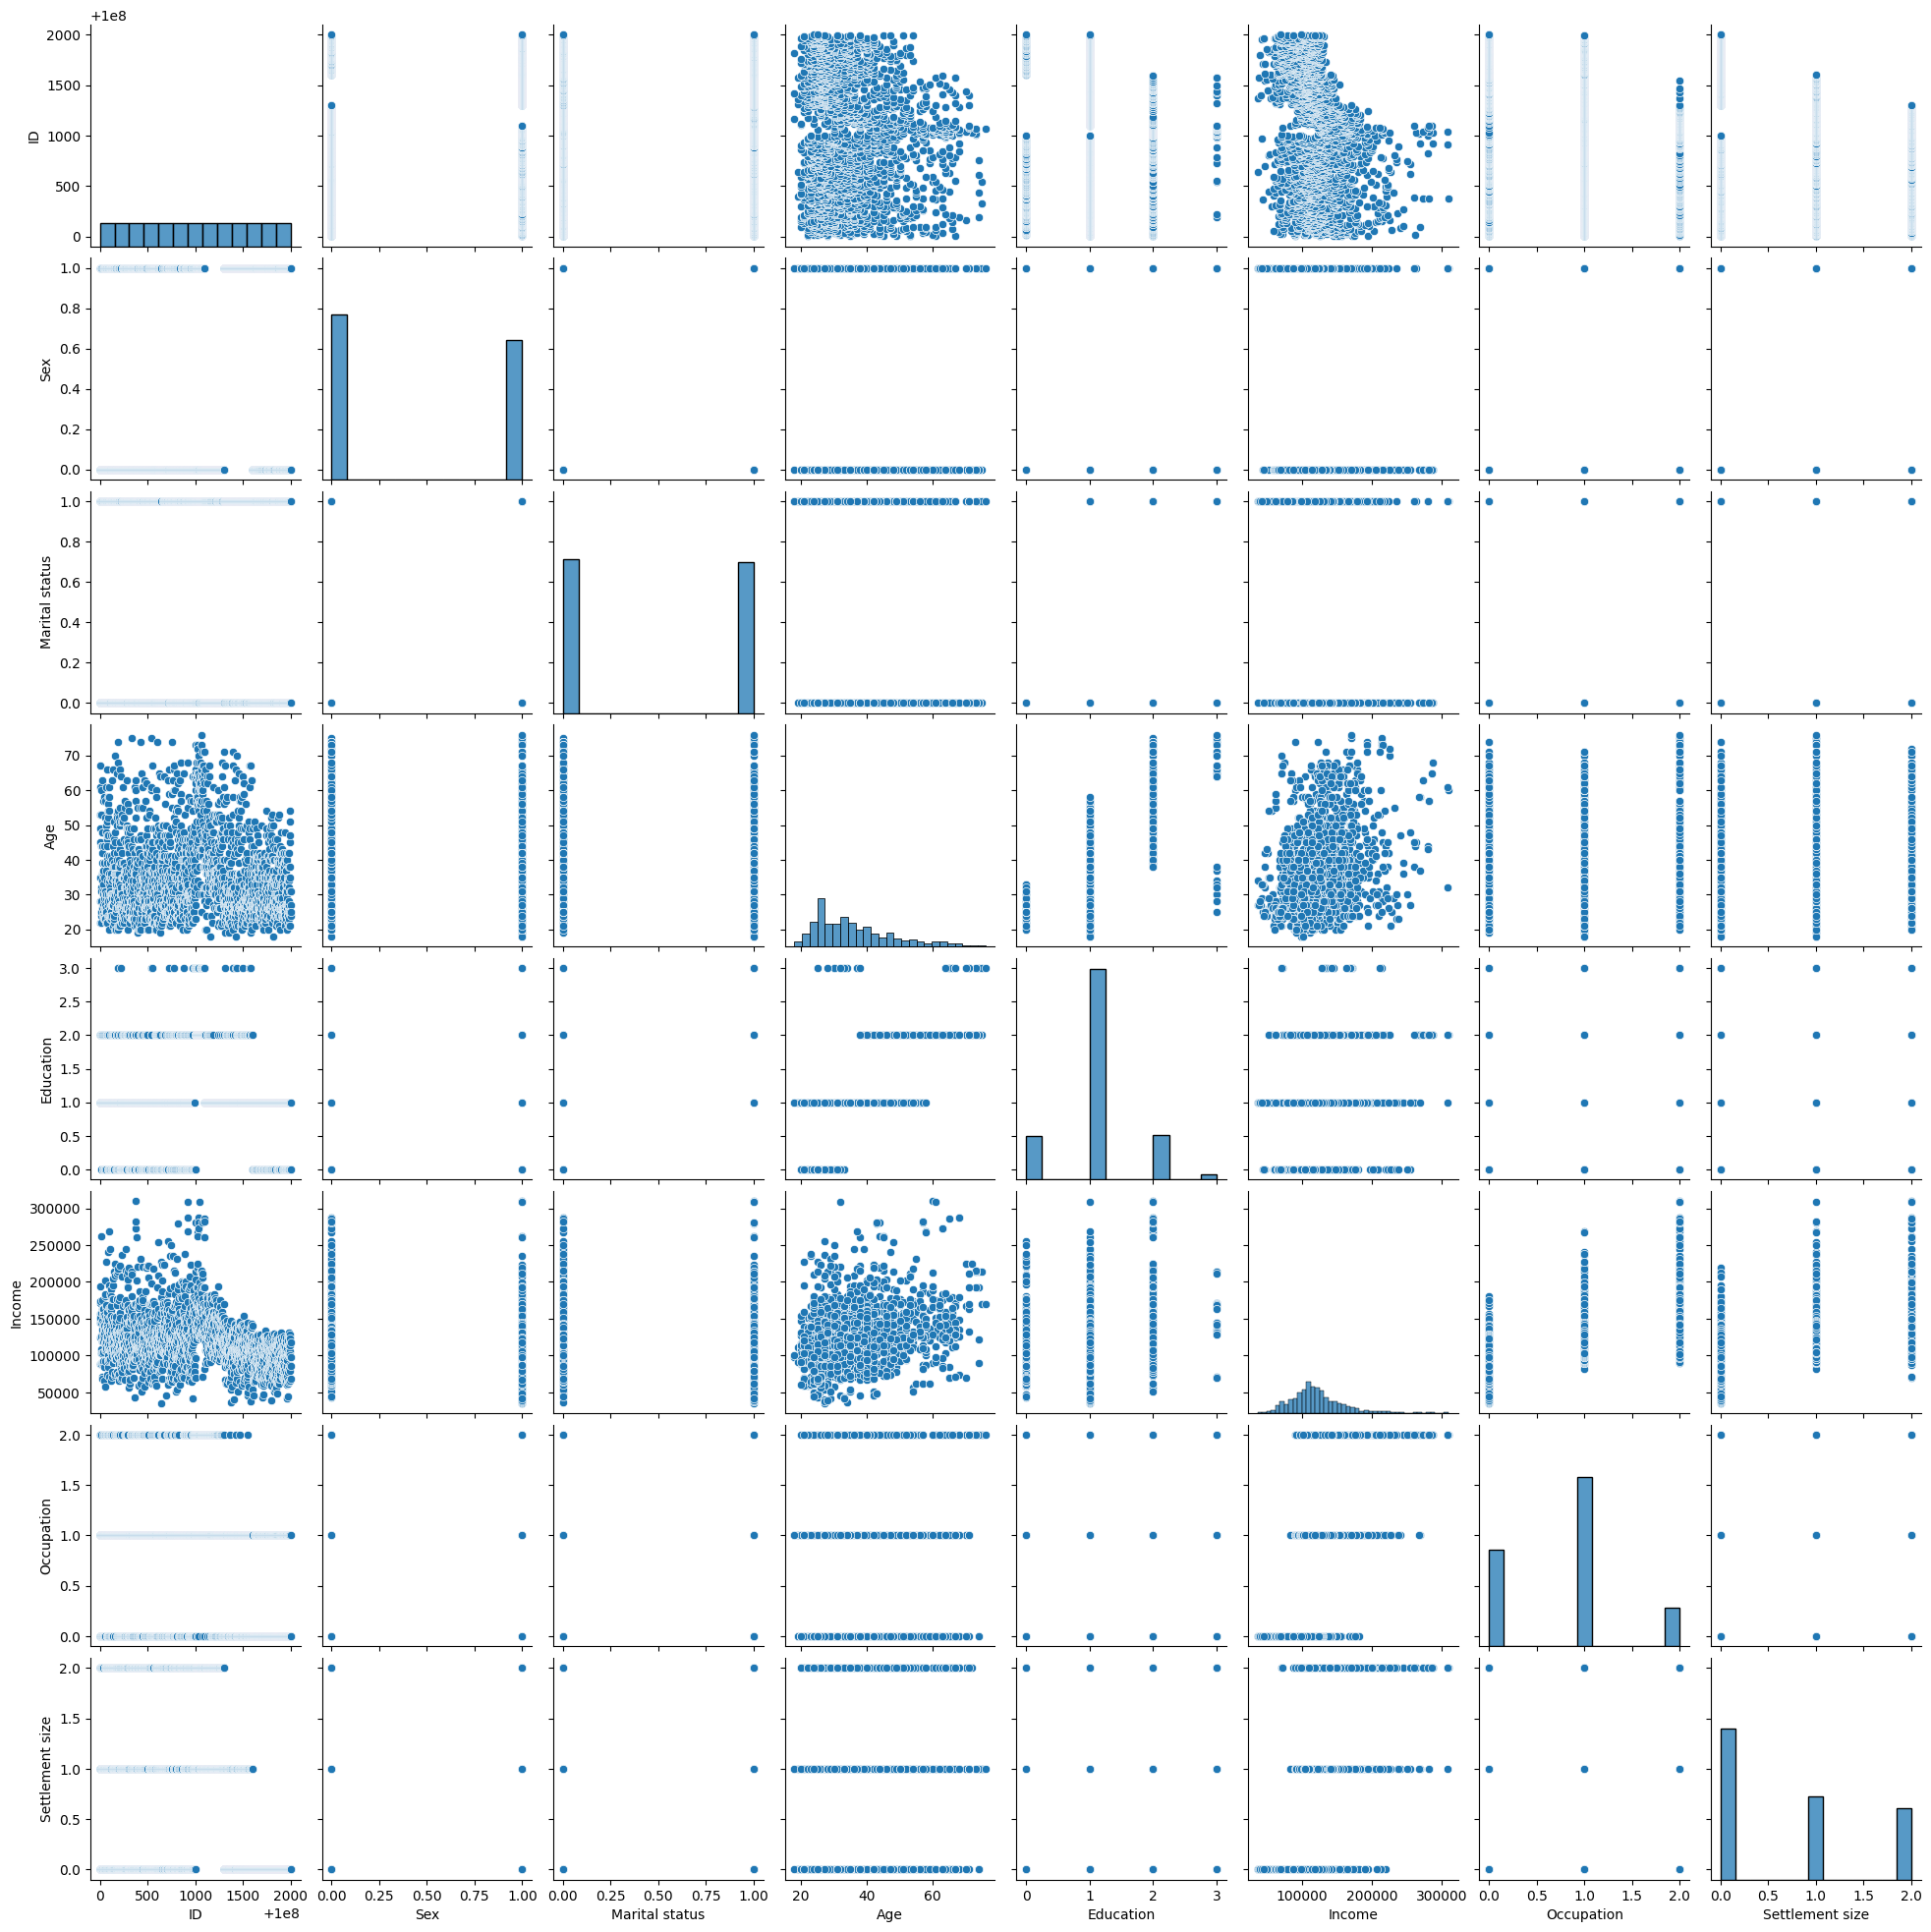

In [743]:
sns.pairplot(data=data)
plt.show()

Checking The Distribution of Features


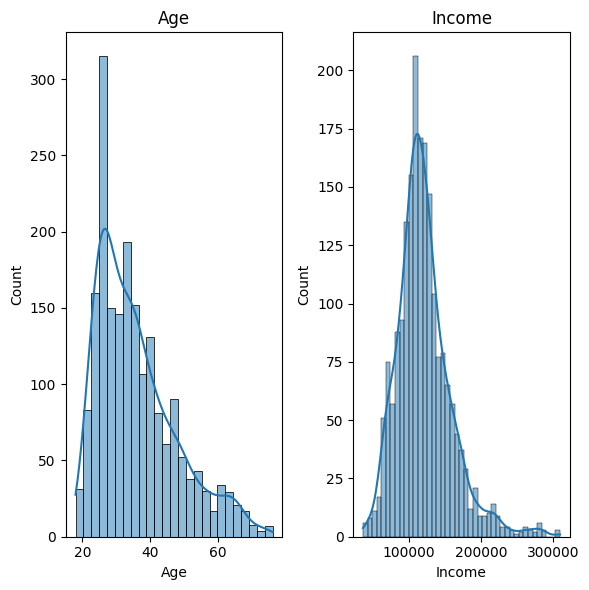

In [744]:
plt.figure(figsize=(6,6))
p = 1
for i in data.drop(columns=['ID', 'Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size'], axis=1):
  if p <= 2:
    plt.subplot(1,2,p)
    sns.histplot(x = data[i], kde=True)
    plt.title(i)
  p+=1
plt.tight_layout()
plt.show()


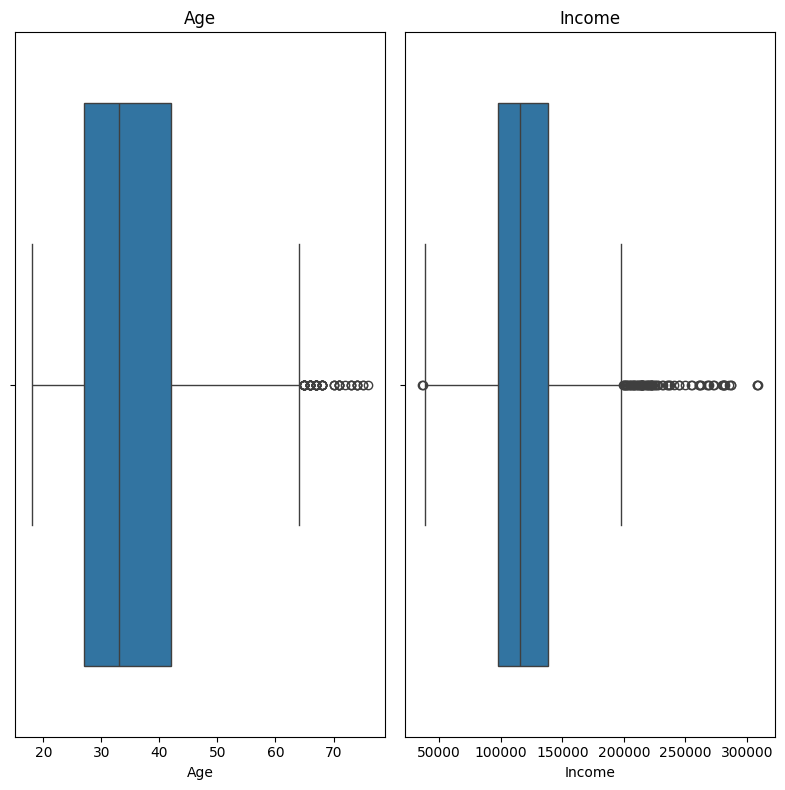

In [745]:
# Finding Outliers Using Boxplot
plt.figure(figsize=(8,8))
p = 1
for i in data.drop(columns=['ID', 'Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size'], axis=1):
  if p <= 2:
    plt.subplot(1,2,p)
    sns.boxplot(x = data[i])
    plt.title(i)
  p+=1
plt.tight_layout()
plt.show()

In [746]:
#Outliers Handeling IQR Method
def remove_outliers(df, columns):
  for col in columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    median = df[col].median()

    df[col] = df[col].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

  return df

In [747]:
cols = ['Age', 'Income']
df_clean = remove_outliers(data, cols)

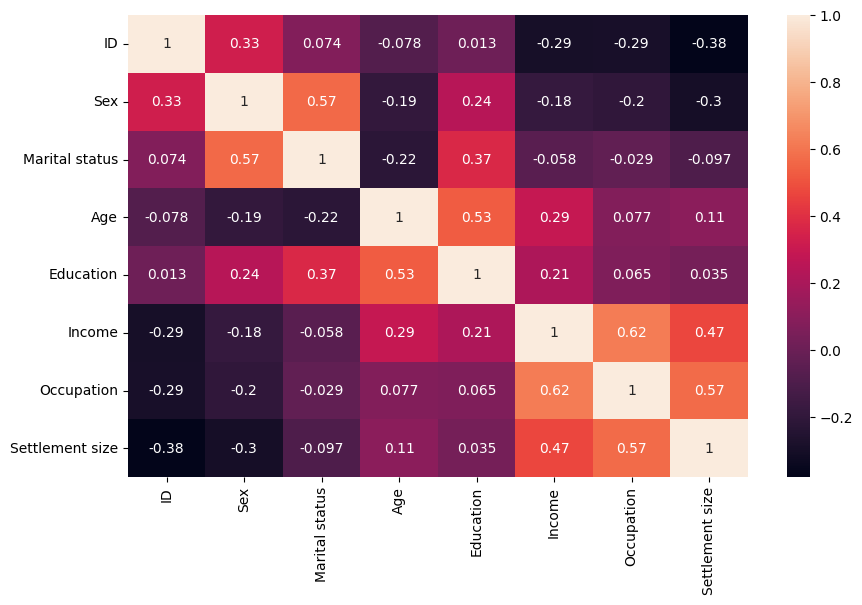

In [748]:
# Checking The Corelation
plt.figure(figsize=(10,6))
sns.heatmap(df_clean.corr(), annot=True)
plt.show()

In [749]:
df = df_clean.copy()

In [750]:
# Scalling The Data
sc = StandardScaler()
df_clean[['Age', 'Income']] = sc.fit_transform(df_clean[['Age', 'Income']])

**Determining The Optimal Value Befor Clustering**

In [751]:
snn = []
for i in range(1,11):
  km = KMeans(n_clusters=i, n_init='auto')
  km.fit(data)
  snn.append(km.inertia_)
print(snn)

[666674350.3270003, 166675126.92923415, 74085784.77152131, 41681940.405079536, 26686844.080692712, 18548457.785618737, 13621977.24087154, 10429408.149529656, 8268558.510540055, 6698476.042723484]


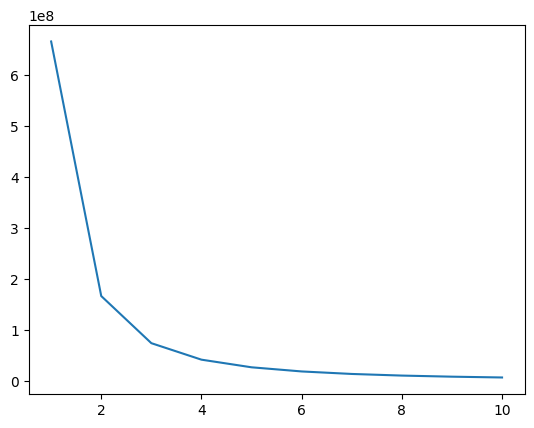

In [752]:
plt.plot(range(1,11), snn)


In [753]:
# Model Trainning
model = KMeans(n_clusters=2, n_init='auto')
model.fit(df_clean.drop('ID', axis=1))

KMeans(n_clusters=2)

In [754]:
# Clusters
model.labels_

array([1, 1, 0, ..., 0, 0, 0], dtype=int32)

In [755]:
# Adding The Clusters as a new column
df_clean['cluster'] = model.labels_
df['cluster'] = model.labels_

In [756]:
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,100000001,0,0,33.0,2,124670.0,1,2,1
1,100000002,1,1,22.0,1,150773.0,1,2,1
2,100000003,0,0,49.0,1,89210.0,0,0,0
3,100000004,0,0,45.0,1,171565.0,1,1,1
4,100000005,0,0,53.0,1,149031.0,1,1,1
...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47.0,1,123525.0,0,0,0
1996,100001997,1,1,27.0,1,117744.0,1,0,0
1997,100001998,0,0,31.0,0,86400.0,0,0,0
1998,100001999,1,1,24.0,1,97968.0,0,0,0


<Axes: xlabel='Age', ylabel='Income'>

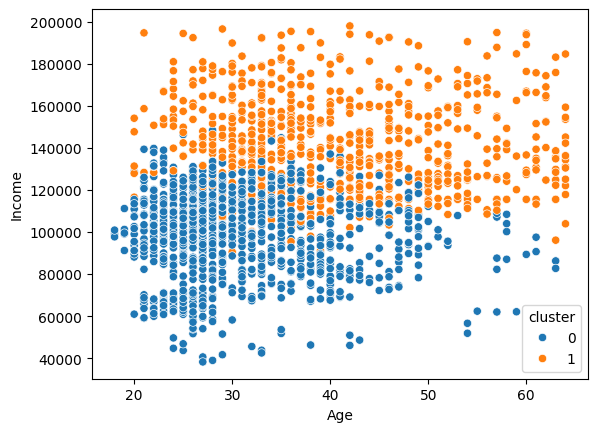

In [758]:
sns.scatterplot(data=df, x = 'Age', y='Income', hue='cluster')

In [760]:
silhouette_score(df_clean.drop('ID', axis=1), model.labels_)

np.float64(0.30693799814537115)

In [761]:
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,100000001,0,0,33.0,2,124670.0,1,2,1
1,100000002,1,1,22.0,1,150773.0,1,2,1
2,100000003,0,0,49.0,1,89210.0,0,0,0
3,100000004,0,0,45.0,1,171565.0,1,1,1
4,100000005,0,0,53.0,1,149031.0,1,1,1
...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47.0,1,123525.0,0,0,0
1996,100001997,1,1,27.0,1,117744.0,1,0,0
1997,100001998,0,0,31.0,0,86400.0,0,0,0
1998,100001999,1,1,24.0,1,97968.0,0,0,0


In [762]:
df.to_csv('clustered_output.csv', index=False)